In [2]:
%matplotlib inline

import os
from collections import defaultdict, Counter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

from __init__ import calc_perceptual_hash, get_sub_images


plt.rcParams.update({'figure.max_open_warning': 0})

In [5]:
captcha_dir = '/home/haonans/capstone/raw_images/'
captcha_path_list = '/home/haonans/capstone/captcha_path_list.txt'

all_dist = []
buckets = defaultdict(list)
with open(captcha_path_list) as reader:
    for _ in xrange(10000):
        cur_path = os.path.join(captcha_dir, reader.readline().strip())
        sub_images = get_sub_images(Image.open(cur_path))
        gray_hashes = map(lambda i: calc_perceptual_hash(i, mode='GRAY', return_hex_str=True), sub_images)
        rgb_hashes = map(lambda i: calc_perceptual_hash(i, mode='RGB', return_hex_str=False), sub_images)
        for i in xrange(8):
            if gray_hashes[i] in buckets:
                for prev_rgb_hash in buckets[gray_hashes[i]]:
                    all_dist.append(np.sum(rgb_hashes[i] != prev_rgb_hash))
            else:
                buckets[gray_hashes[i]].append(rgb_hashes[i])
counter = Counter(all_dist)     
for i in xrange(20):
    print i, counter[i]

0 8667
1 4454
2 3168
3 2372
4 1826
5 1385
6 973
7 708
8 535
9 380
10 314
11 220
12 140
13 140
14 89
15 59
16 43
17 20
18 25
19 17


0 1030
1 513
2 368
3 302
4 222
5 163
6 114
7 99
8 47
9 38
10 29
11 32
12 15
13 17
14 9
15 12
16 3
17 4
18 1
19 2


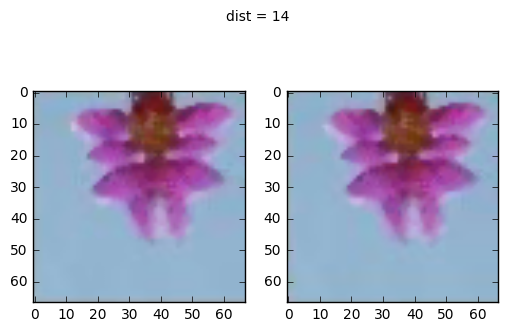

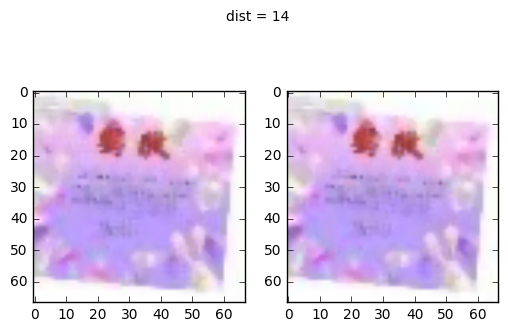

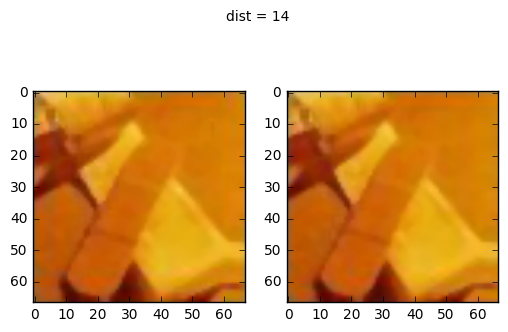

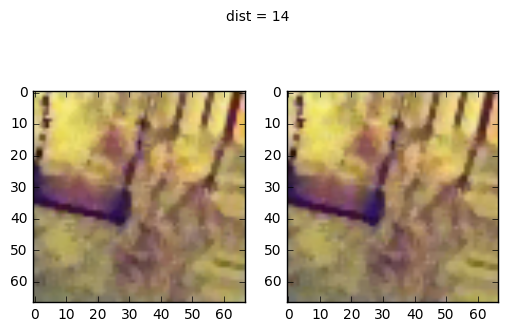

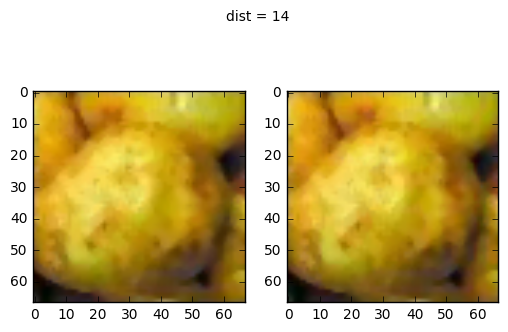

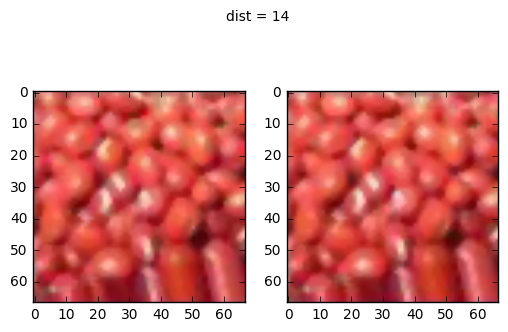

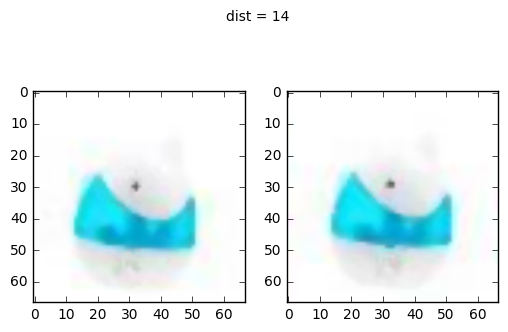

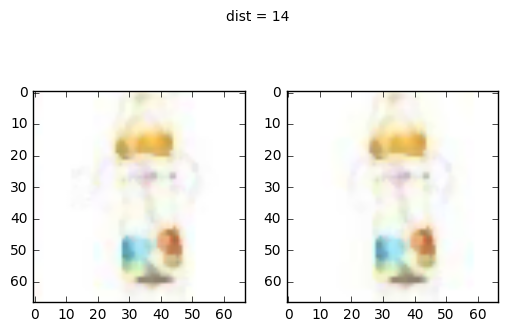

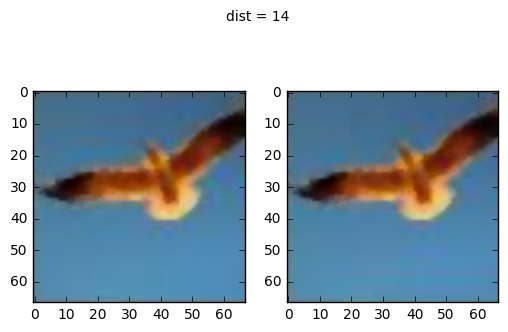

In [6]:
# This is rgb hashes
captcha_dir = '/home/haonans/capstone/raw_images/'
captcha_path_list = '/home/haonans/capstone/captcha_path_list.txt'

all_dist = []
buckets = defaultdict(list)
with open(captcha_path_list) as reader:
    for _ in xrange(2000):
        cur_path = os.path.join(captcha_dir, reader.readline().strip())
        sub_images = get_sub_images(Image.open(cur_path))
        gray_hashes = map(lambda i: calc_perceptual_hash(i, mode='GRAY', return_hex_str=True), sub_images)
        rgb_hashes = map(lambda i: calc_perceptual_hash(i, mode='RGB', return_hex_str=False), sub_images)
        for i in xrange(8):
            if gray_hashes[i] in buckets:
                for prev_sub_image in buckets[gray_hashes[i]]:
                    prev_rgb_hash = calc_perceptual_hash(prev_sub_image, mode='RGB', return_hex_str=False)
                    dist = np.sum(rgb_hashes[i] != prev_rgb_hash)
                    all_dist.append(dist)
                    
                    if dist >= 14 and dist <= 14:
                        fig = plt.figure()
                        fig.suptitle('dist = {}'.format(dist))
                        plt.subplot(1,2,1)
                        plt.imshow(sub_images[i])
                        plt.subplot(1,2,2)
                        plt.imshow(prev_sub_image)
            else:
                buckets[gray_hashes[i]].append(sub_images[i])

counter = Counter(all_dist)     
for i in xrange(20):
    print i, counter[i]